# 1. Problem Statement and Overview

><div class="alert alert-info" role="alert">
><ul>
>    <li>Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.</li>
>    <li>The existing database will serve as a repository of public customer complaints filed against Comcast. It will help to pin down what is wrong with Comcast's customer service.</li>
></ul>
></div>



## Data Dictionary:
><div class="alert alert-info" role="alert">
><ul>
>    <li><b>Ticket #</b> : Ticket number assigned to each complaint</li>
>    <li><b>Customer Complaint</b> : Description of complaint</li>
>    <li><b>Date</b> : Date of complaint</li>
>    <li><b>Time</b> : Time of complaint</li>
>    <li><b>Received Via</b> : Mode of communication of the complaint</li>
>    <li><b>City</b> : Customer city</li>
>    <li><b>State</b> : Customer state</li>
>    <li><b>Zipcode</b> : Customer zip</li>
>    <li><b>Status</b> : Status of complaint</li>
>    <li><b>Filing on behalf of someone</b> : Yes / No</li>
></ul>
></div>



## Goal of this notebook
><div class="alert alert-info" role="alert">
><ul>
><li>Exploratory Data Analysis</li>
><li>Data Preprocessing</li>
><li>Perform Analytical Tasks
>    <br>Complaints received Monthly Basis
>    <br>Complaints received Daily Basis 
><li>Table with the frequency of complaint types.
>    <br>Which complaint types are maximum i.e., around internet, network issues, or across any other domains.</p>
><li>Creating a new categorical variable with value as Open and Closed.
><li>State wise status of complaints in a stacked bar chart. 
>    <br>Which state has the maximum complaints
>    <br>Which state has the highest percentage of unresolved complaints</p>
><li>Percentage of complaints resolved till date, which were received through the Internet and customer care calls.</li>
></ul>
></div>

# 2. Import Required Libraries
<a id='# 2. Import Required Libraries'></a>

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# import required libraries
import numpy as np
import pandas as pd
import datetime as dt

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for Interactive Shells
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

# For words Preprocessesing
import nltk
import re
from bs4 import BeautifulSoup as bs
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nshre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 3. Exploratory Data Analysis

In [2]:
data = pd.read_csv("Comcast_telecom_complaints_data.csv")
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
data.shape
data['Date'].unique()

array(['22-04-15', '04-08-15', '18-04-15', '05-07-15', '26-05-15',
       '06-12-15', '24-06-15', '23-06-15', '06-01-15', '28-06-15',
       '24-04-15', '05-06-15', '13-06-15', '30-06-15', '27-06-15',
       '16-04-15', '04-11-15', '06-02-15', '06-07-15', '06-08-15',
       '05-02-15', '22-06-15', '28-04-15', '24-05-15', '29-04-15',
       '19-05-15', '28-05-15', '06-05-15', '20-06-15', '29-06-15',
       '21-05-15', '18-06-15', '16-06-15', '05-12-15', '14-04-15',
       '15-04-15', '13-05-15', '27-05-15', '19-06-15', '25-06-15',
       '26-06-15', '17-06-15', '15-05-15', '04-09-15', '30-04-15',
       '15-06-15', '17-04-15', '04-01-15', '19-04-15', '04-12-15',
       '23-04-15', '05-01-15', '05-05-15', '05-08-15', '16-05-15',
       '22-05-15', '23-05-15', '25-05-15', '29-05-15', '30-05-15',
       '06-03-15', '06-04-15', '06-10-15', '04-07-15', '06-11-15',
       '27-04-15', '25-04-15', '18-05-15', '06-06-15', '04-10-15',
       '31-05-15', '05-10-15', '21-04-15', '04-03-15', '05-04-

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


## Observations:
><div class="alert alert-info" role="alert">
><ul>
><li> No null values</li>
><li> Since there is no continuous numerical data, No question of outliers.</li>
><li> Date and time are string type (object).</li>
><li> We can put date and time together in one column, called 'Date_month_year'</li>
><li> Create a columns for month and month_day for visualizing complaints better. </li>
><li> Finally drop columns for Date and Time.</li>
></ul>
></div>

# 3. Data Preprocessing
1. Convert Date_Time into datetime format.
2. Create a new column Date_Time and delete Date and Time Columns.

In [5]:
# Create a new col Date_Time 
data["Date_month_year"] = pd.to_datetime(data["Date_month_year"])
data['month'] = data['Date_month_year'].dt.month
data['month_day'] = data['Date_month_year'].dt.strftime('%m-%d')


# Finally, drop the Date and Time Variables
del data['Date']
del data['Time']

# Let's check data types now
data.dtypes

Ticket #                               object
Customer Complaint                     object
Date_month_year                datetime64[ns]
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
month                                   int64
month_day                              object
dtype: object

#  Trend chart for the number of complaints at monthly and daily granularity levels.
## Complaints received Monthly Basis  

,Customer Complaint
month,
6,1046
4,375
5,317
8,67
12,65
2,59
1,55
9,55
10,53


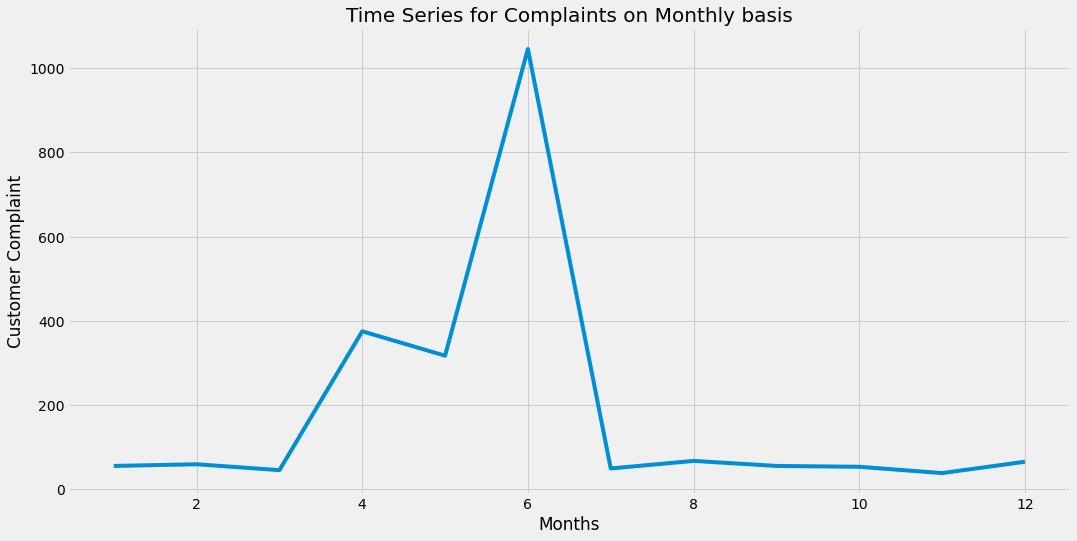

In [6]:
display(data[['Customer Complaint', 'month']].groupby(['month']).agg('count').sort_values(by = 'Customer Complaint', ascending = False).style.background_gradient(cmap =  'Reds'))

# Complaints received Monthly Basis
daily_complaints =data[['Customer Complaint', 'month']].groupby('month').count().reset_index()

sns.lineplot(daily_complaints['month'], daily_complaints['Customer Complaint'])
plt.title("Time Series for Complaints on Monthly basis", fontsize = 20)
plt.xlabel("Months")
plt.show()

## Observations:
><div class="alert alert-info" role="alert">
><ul>
><li> 6th month ('June') observed the heighest complaints from the customers. 1046 being maximum.</li>
><li> 11th month ('November') observed lowest complaints from the customers. 38 being the minimum.</li>
><li> Complaints started increasing from 3rd month ('March'). Being 35 complaints in march and 375 complaints in April.</li>
><li> From 7th month ('July') we observe sudden drop on the complaints. From 1046 in June and 49 in July.</li>
></ul>
></div>

# Complaints received Daily Basis

In [7]:
print("20 Days with most Complaints")
data.groupby('month_day').count()[['Customer Complaint']].reset_index().sort_values(by = 'Customer Complaint',ascending = False).head(20).style.background_gradient('Reds')

20 Days with most Complaints


,month_day,Customer Complaint
66,06-24,218
65,06-23,190
67,06-25,98
68,06-26,55
72,06-30,53
71,06-29,51
60,06-18,47
90,12-06,43
69,06-27,39
57,06-15,34


## Observations:
><div class="alert alert-info" role="alert">
><ul>
><li> Above table shows 20 days with most complaints.</li>
><li> We could see that 23 June-25 June observed the maximum complaints. Maximum count being 218 on 24th June.</li>
></ul>
></div>

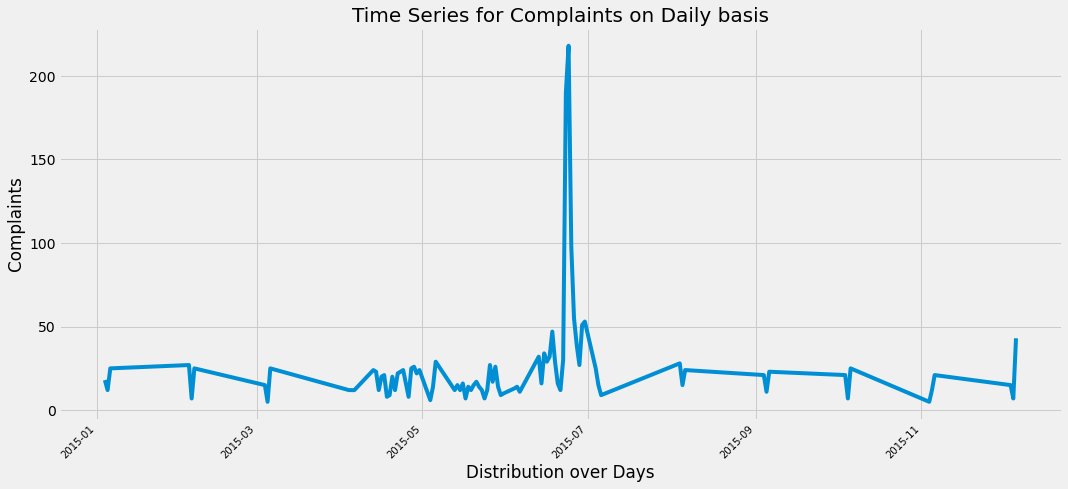

In [8]:

data["Date_month_year"].value_counts().plot(kind = 'line');
plt.title("Time Series for Complaints on Daily basis", fontsize = 20)
plt.xticks(fontsize = 10, rotation = 45)
plt.xlabel("Distribution over Days")
plt.ylabel("Complaints")
plt.show();


## Observations:
><div class="alert alert-info" role="alert">
><ul>
><li> Above linechart shows the complaints received over days.</li>
><li> We could see the upward trends of complaints around End of June and that actually proves the observation we saw on above visualizations using tables and line charts. </li>
></ul>
></div>


## To see the trend as per each day of the year refer to the chart below.

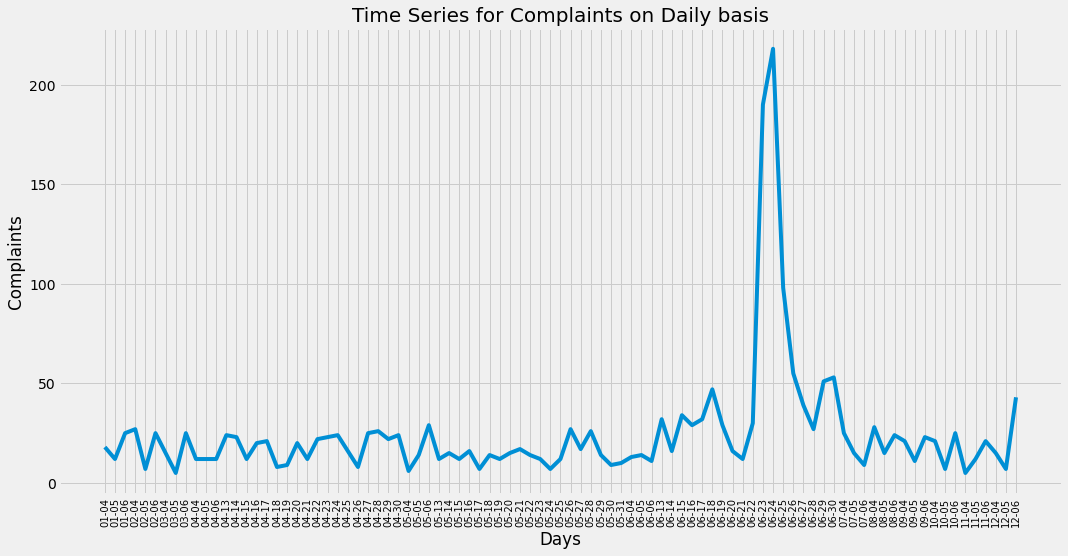

In [9]:
daily_complaints =data[['Customer Complaint','month_day']].groupby('month_day').count().reset_index()
sns.lineplot(daily_complaints['month_day'], daily_complaints['Customer Complaint'])
plt.title("Time Series for Complaints on Daily basis", fontsize = 20)
plt.xticks(fontsize = 10, rotation = 90)
plt.xlabel("Days")
plt.ylabel("Complaints")
plt.show();

## Observations:
><div class="alert alert-success" role="alert">
><ul>
><li>1. Above Linechart shows the trend of complaints over days displaying each day in format mont_day.</li>
><li>2. As expected from the trend chart of month, days in 6th month ('June') observe the maximum sailes.</li>
><li>3. We can further observe that complaints were maximum during 23 June to 25 June. 215 complaints being maximum</li>
><li>4. Complaints were minimum on 4th Nov. Exact count being 5.</li>
></ul>
></div>

# Table with the frequency of complaint types. 

## Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

### Pseudo code for clearly presenting Complaint types:






><div class="alert alert-info" role="alert">
><ul>
><li> Here we can preprocess the {Customer Complaint} column and store the results by making another column in our original data set 'Preprocessed_complaints'. </li>
><li> Creating a function which takes in complaint and returns preprocessed complaint, finally applying the function to our own dataset could be a way out.</li>
><li> Next we need different complaint_types (decided using 'Preprocessed_complaints' column) using which we should be able to divide our complaints into different types.</li>
><li> Different types of complaints we could think practically and then by looking at random complaints. We can use complaint types as 'Internet Issues', 'Customer_Services Issues','Network/Speed Issues', 'Comcast Issues', 'Others'. </li>
><li> Finally we create a function that uses words from 'Preprocessed_complaints' column and decides that particular complaint belongs to which of the 5 Complaint Types mentioned above. </li>
></ul>
></div>

In [10]:
#checking the counts of the Complaint types
data['Customer Complaint'].value_counts().head(7)

Comcast              83
Comcast Internet     18
Comcast Data Cap     17
comcast              13
Data Caps            11
Comcast Data Caps    11
Comcast Billing      11
Name: Customer Complaint, dtype: int64

In [11]:
# Creating a function substitute the words such as won't to will not etc...
def decontracted(phrase):
    """input: some sentence - not preprocessed sentance basically.
       Output: processes the words such as "won't" to 'will not' etc. 
    """
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"wouldn't", "would not", phrase)
    phrase = re.sub(r"did't", "did not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'s", "", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

# Let's try this function on some complaint
print(decontracted("comcast won't cancel my service"))
print(decontracted("comcast does not disclose the internet speed i'm paying for anywhere on my bill or online"))

comcast will not cancel my service
comcast does not disclose the internet speed i am paying for anywhere on my bill or online


In [12]:
def preprocess_complaints(comp):
    """input: Takes in complaints (Sting type sentences)
       output: Returns preprocessed version of complaints these steps consists of lower case, 
       decontracted(function mentioned above), remove speacial characters
    """
    comp = bs(comp, 'lxml').get_text()  # using  beatifulSoup4 to extract complaints in one variables
    comp = comp.lower() #lower case the complaint
    comp = decontracted(comp) # using custom function to replace words like won't to will not etc
    comp = re.sub('[^A-Za-z]+', ' ', comp) #remove any special character.
    comp = " ".join(e for e in comp.split() if e not in set(stopwords.words('english'))) #joining everything what we did till now
    return comp

# applying the fucntion preprocess_complaints to data['Customer Complaint'] (orginal dataset) 
# and assinging it to a new column in the original dataset:
data['Preprocessed_complaints']=data['Customer Complaint'].apply(lambda x : preprocess_complaints(x))

# Let's take a look into the Results of what we did till now:
data.head()[['Customer Complaint', 'Preprocessed_complaints']]

,Customer Complaint,Preprocessed_complaints
0,Comcast Cable Internet Speeds,comcast cable internet speeds
1,Payment disappear - service got disconnected,payment disappear service got disconnected
2,Speed and Service,speed service
3,Comcast Imposed a New Usage Cap of 300GB that ...,comcast imposed new usage cap gb punishes stre...
4,Comcast not working and no service to boot,comcast working service boot


,Customer Complaint,Preprocessed_complaints,Complaint_Type
0,Comcast Cable Internet Speeds,comcast cable internet speeds,Internet Issues
1,Payment disappear - service got disconnected,payment disappear service got disconnected,Customer_Services Issues
2,Speed and Service,speed service,Network/Speed Issues
3,Comcast Imposed a New Usage Cap of 300GB that ...,comcast imposed new usage cap gb punishes stre...,Internet Issues
4,Comcast not working and no service to boot,comcast working service boot,Customer_Services Issues


,Complaint_Type,Count
2,Internet Issues,750
1,Customer_Services Issues,605
0,Comcast Issues,500
4,Others,284
3,Network/Speed Issues,85


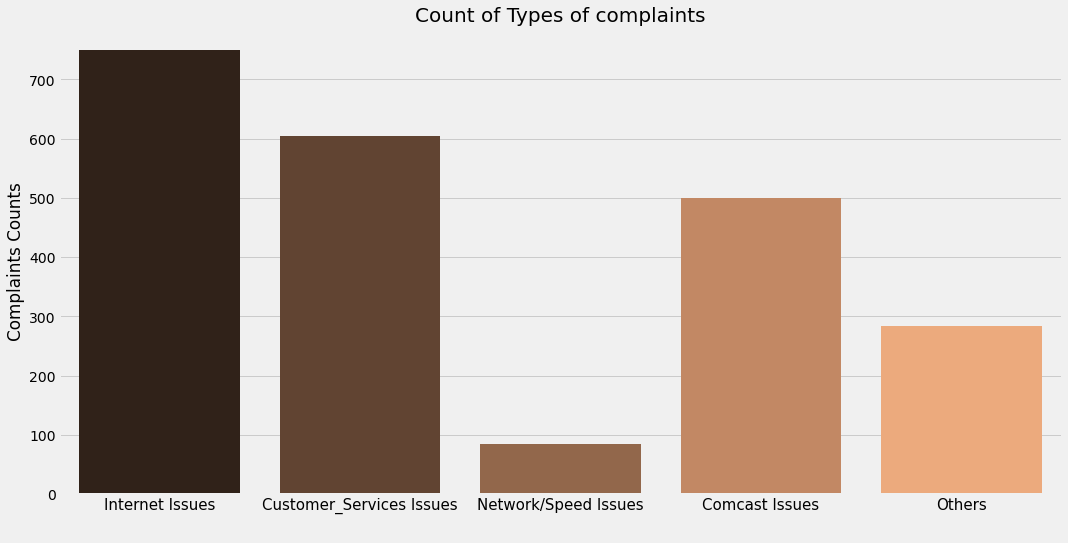

In [25]:
# Creating a function for assigning complaint_types to different complaints raised by the users.
def complaint_type(row):
    if ("internet" in row['Preprocessed_complaints']) or ("data" in row['Preprocessed_complaints']) or ("cap" in row['Preprocessed_complaints']):
            return 'Internet Issues'
    elif("network" in row['Preprocessed_complaints']) or ("speed" in row['Preprocessed_complaints']):
            return "Network/Speed Issues"
    elif("service" in row['Preprocessed_complaints']) or ("bill" in row['Preprocessed_complaints']) or ("customer" in row['Preprocessed_complaints']):
            return "Customer_Services Issues"
    elif("comcast" in row['Preprocessed_complaints']):
            return "Comcast Issues"
    else:
            return "Others"
        
# applying the function complaint_type() to our original dataset and assigning the results to a new column in original dataset  
data['Complaint_Type'] = data.apply(lambda row: complaint_type(row), axis=1).to_frame()

# Let's check what we did till now
display(data.head()[['Customer Complaint', 'Preprocessed_complaints', 'Complaint_Type']])

# Displaying a table showing different complaint types and respective counts
display(data.groupby(by = 'Complaint_Type')[['Customer Complaint']].count().reset_index().rename({'Customer Complaint': "Count"}, axis=1).sort_values(by = 'Count', ascending = False).style.background_gradient("copper_r"))

# Plotting the Complaint types and count
sns.countplot(data['Complaint_Type'], palette='copper')
plt.title("Count of Types of complaints", fontsize = 20)
plt.xticks(fontsize = 15)
plt.xlabel(" ")
plt.ylabel("Complaints Counts")
plt.show();

## Observations:
><div class="alert alert-info" role="alert">
><ul>
><li>1. Above results, in order, shows table with:
><br>Complaints, preprocessed complaints and complaint types.
><br>Complaint_types and Counts
><br>Countplot of Complaint_Type
><li>2. We see that {Type:Internet issues} have the maximum complaints. Exact count being 750.</li>
><li>3. {Type:Network/Speed issues} have the minimum complaints when compared to other types. Exact count 85.</li>
></ul>
></div>

# Insights:
## {Type:Internet issues} consists of words: {internet, data, cap}. Hence we could say most of customers have problem around internet, data and cap(capacity).

In [14]:
# Finally we can even get percentage of the complaint types, by following percentage
def get_simple_topic_percentage(topic):
    """
    Returns a percentage of rows that this particular topic is found
    in using simple string manipulation.
    
    topic: the customer complaint category entered by the customer.
    """
    return round(data[data['Complaint_Type'].str.contains(topic, case=False)].shape[0] / len(data['Complaint_Type']) * 100, 2)
    


# Creating a dictionary of different issues and its respective percentage.
percentage = {'Internet Issues': [get_simple_topic_percentage('Internet Issues')], 'Customer_Services Issues':[get_simple_topic_percentage('Customer_Services Issues')], 
        'Comcast Issues': [get_simple_topic_percentage('Comcast Issues')], 'Others':[ get_simple_topic_percentage('Others')], 'Network/Speed Issues': [get_simple_topic_percentage('Network/Speed Issues')]}
 
# Create the pandas DataFrame
df_percentage = pd.DataFrame(percentage).transpose().rename({0: 'Percentage'}, axis =1).style.background_gradient("Oranges")


df_percentage

,Percentage
Internet Issues,33.720000
Customer_Services Issues,27.200000
Comcast Issues,22.480000
Others,12.770000
Network/Speed Issues,3.820000


## Observations:
><div class="alert alert-info" role="alert">
><ul>
><li>Percentage also proves the insights we metioned above i.e. internet issues has the highest percentage of complaints, value being 33.72%</li>
></ul>
></div>

# Create a new categorical variable with value as Open and Closed.

# Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [15]:
data['Status'].replace({'Solved':'Closed','Pending':'Open'}, inplace= True)

print('Unique Values in Column Status: ',data['Status'].nunique())
data[['Status']].value_counts().to_frame().reset_index().rename({0: "Count"}, axis=1).style.background_gradient('crest')


Unique Values in Column Status:  2


,Status,Count
0,Closed,1707
1,Open,517



## Observations:
><div class="alert alert-info" role="alert">
><ul>
><li>Status column had 4 levels which is now converted into 2 levels: Closed and Open which actually makes the dataset more clean and easy to read</li>
></ul>
></div>

# Provide state wise status of complaints in a stacked bar chart

In [16]:
print('Highest Complaints State wise:')
display(data.groupby(['State']).size().sort_values(ascending = False).to_frame().head(6).reset_index().rename({0: "Count"}, axis = 1).style.background_gradient('Reds'))
print('Lowest Complaints State wise:')
display(data.groupby(['State']).size().sort_values().to_frame().head(6).reset_index().rename({0: "Count"}, axis = 1).style.background_gradient('Reds'))

Highest Complaints State wise:


,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143
5,Pennsylvania,130


Lowest Complaints State wise:


,State,Count
0,Nevada,1
1,Iowa,1
2,Montana,1
3,Rhode Island,1
4,District of Columbia,1
5,Kansas,2



## Observations:
><div class="alert alert-info" role="alert">
><ul>
><li>Above Tables show the Highest and Lowest Complaints statewise. Not taking in account that complaint is still open or aready closed. </li>
><li>We see that Gorgia Florida and California has the highest complaints, count being 288, 240, 220 respectively.</li>
><li>Naveda Iowa Montana Rhode islands District of Columbia has the lowest complaints count being 1 for each</li>
><li>We need better tables which shows even the open and closed complaints separately to see what actually is going on behind these numbers.</li>
></ul>
></div>


Highest Open and Closed Complaints State wise:


Status,Closed,Open
State,,
Georgia,208.000000,80.000000
Florida,201.000000,39.000000
California,159.000000,61.000000
Illinois,135.000000,29.000000
Pennsylvania,110.000000,20.000000
Tennessee,96.000000,47.000000
Michigan,92.000000,23.000000


Lowest Open and Closed Complaints State wise:


Status,Closed,Open
State,,
Nevada,1.000000,0.000000
Kansas,1.000000,1.000000
Iowa,1.000000,0.000000
Montana,1.000000,0.000000
District of Columbia,1.000000,0.000000
Rhode Island,1.000000,0.000000
Vermont,2.000000,1.000000


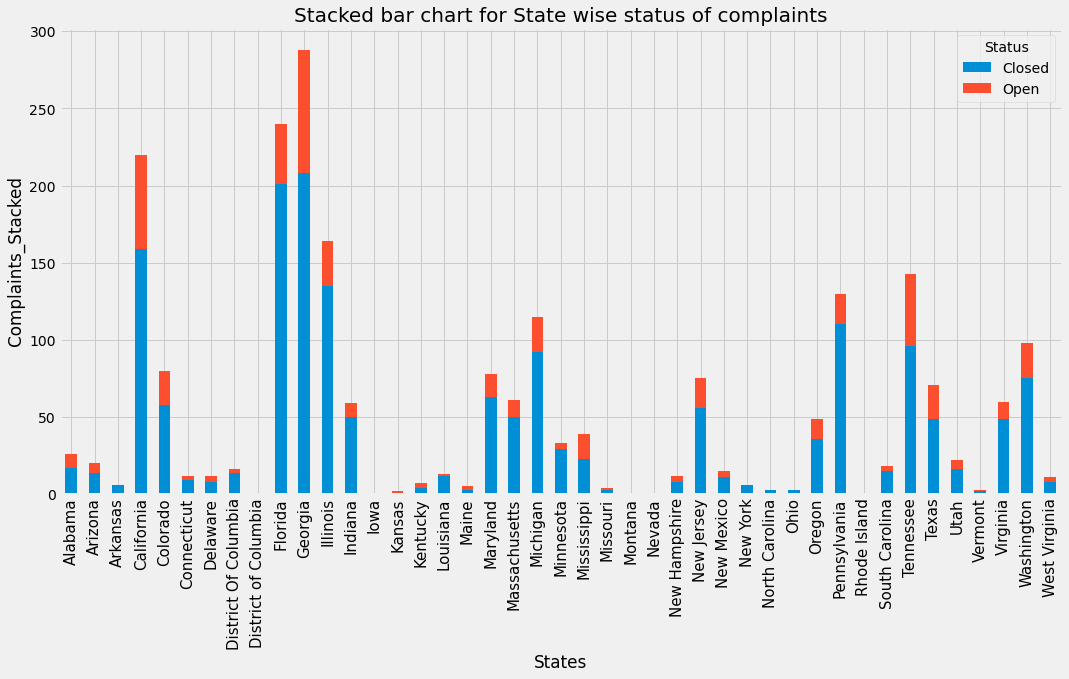

In [17]:
print('Highest Open and Closed Complaints State wise:')
display(data.groupby(["State","Status"]).size().unstack().sort_values(by='Closed', ascending = False).fillna(0).head(7).style.background_gradient('Purples'))

print('Lowest Open and Closed Complaints State wise:')
display(data.groupby(["State","Status"]).size().unstack().sort_values(by='Closed').fillna(0).head(7).style.background_gradient('Purples'))

Status_complaints=data.groupby(["State","Status"]).size().unstack().fillna(0)
Status_complaints.plot(kind="bar", stacked=True)
plt.title("Stacked bar chart for State wise status of complaints", fontsize = 20)
plt.xticks(fontsize = 15)
plt.xlabel("States")
plt.ylabel("Complaints_Stacked")
plt.show();

## Observations:
><div class="alert alert-info" role="alert">
><ul>
><li>Above two tables shows the Highest and Lowest Open and Closed complaints state wise.</li>
><li>We see that Geogia is highest for both Open and Closed complaints. </li>
><li>Stacked Bar Chart clearly shows the closed complaints are more than open complaints overall. </li>
><li>We also observe that Florida has good closing rate in terms of complaints as they have 201 Closed complaints and only 39 open complaints.</li>
></ul>
></div>


# Which state has the maximum complaints

In [18]:
print('Highest Complaints State wise:')
display(data.groupby(['State']).size().sort_values(ascending = False).to_frame().head(1).reset_index().rename({0: "Count"}, axis = 1).style.background_gradient('Reds_r'))

Highest Complaints State wise:


,State,Count
0,Georgia,288


In [19]:
print('Highest Open and Closed Complaints State wise:')
display(data.groupby(["State","Status"]).size().unstack().sort_values(by='Closed', ascending = False).fillna(0).head(1).style.background_gradient('Purples_r'))

Highest Open and Closed Complaints State wise:


Status,Closed,Open
State,,
Georgia,208.000000,80.000000


# Which state has the highest percentage of unresolved complaints
## Formula used : (number of complaints/total complaints) * 100  

In [20]:
complaints = data.groupby(['Status', 'State']).size().unstack().fillna(0).transpose().reset_index()[['State','Open']]


complaints['percentage'] = (complaints['Open'] / 
                  complaints['Open'].sum()) * 100
print("State with highest percentage of unresolved complaints")
complaints.sort_values(by ='percentage', ascending = False ).head(1).style.background_gradient('Reds_r')

State with highest percentage of unresolved complaints


Status,State,Open,percentage
10,Georgia,80.000000,15.473888


## Observations:
><div class="alert alert-info" role="alert">
><ul>
><li>Georgia has the highest percentage of unresolved complaints.</li>
></ul>
></div>

# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [21]:

complaints = data[(data['Status'] == 'Closed') & ((data['Received Via'] == 'Internet') | (data['Received Via'] =='Customer Care Call'))][['Status','Received Via']]
complaints_via_internet_CustomerCare = complaints.groupby('Received Via').count().reset_index()

complaints_via_internet_CustomerCare['Percentage'] = round((complaints_via_internet_CustomerCare['Status'] /
                                                        complaints_via_internet_CustomerCare['Status'].sum())* 100, 2)
print("Percentage of RESSOLVED Complaints received via Customer Care Call and Internet")
complaints_via_internet_CustomerCare.style.background_gradient('Greens')

Percentage of RESSOLVED Complaints received via Customer Care Call and Internet


,Received Via,Status,Percentage
0,Customer Care Call,864,50.620000
1,Internet,843,49.380000



## Observations:
><div class="alert alert-info" role="alert">
><ul>
><li>Ressolved Complaints via Internet is 49.38%</li>
><li>Ressolved Complaints via Customer Care Call is 50.62%</li>
><li>We see that there almost same amount of complaints closed via Customer care and Internet.</li>
></ul>
></div>

# Conclusion
><div class="alert alert-info" role="alert">
><ul>
><li>6th month ('June') observed the heighest complaints from the customers. 1046 being maximum.</li>
><li>11th month ('November') observed lowest complaints from the customers. 38 being the minimum.</li>
><li>Complaints were maximum during 23 June to 25 June. 215 complaints being maximum</li>
><li>Complaints were minimum on 4th Nov. Exact count being 5.</li>
><li>{Type:Internet issues} consists of words: {internet, data, cap}. Hence we could say most of customers have problem around internet, data and cap(capacity).</li>
><li>Percentage also proves the insights we metioned above i.e. internet issues has the highest percentage of complaints, value being 33.72%</li>
><li>We see that Gorgia Florida and California has the highest complaints, count being 288, 240, 220 respectively.</li>
><li>We also observe that Florida has good closing rate in terms of complaints as they have 201 Closed complaints and only 39 open complaints.</li>
><li>We see that Georgia is highest for both Open and Closed complaints. value being 15.47%</li>
><li>Ressolved Complaints via Internet is 49.38% </li>
><li>Ressolved Complaints via Customer Care Call is 50.62%</li>
></ul>
></div>